In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
from pandas import DataFrame,Series
from sklearn.linear_model import LogisticRegression


dc_df = pd.read_csv('E:/Github_dir/data_analysis_py/dc_character_analysis/dc-wikia-data.csv');
#show first 10 data
dc_df = dc_df.drop(['page_id','urlslug','GSM'],axis=1)

dc_df['APPEARANCES'].fillna(0,inplace=True)
dc_df['APPEARANCES'] = dc_df['APPEARANCES'].astype(int)
dc_df.dropna(subset=['FIRST APPEARANCE'],inplace=True)

dc_df['YEAR'] = dc_df['YEAR'].astype(int)

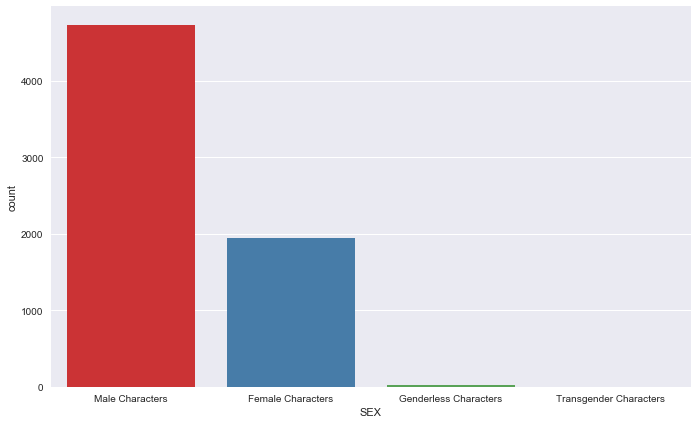

In [111]:
# check male or female plot

sns.factorplot('SEX',data=dc_df,kind='count',palette='Set1',size=6,aspect=1.6)

In [112]:
dc_df['EYE']=dc_df['EYE'].fillna('NO INFO')

In [113]:
dc_df['ALIGN'].value_counts()

Bad Characters        2879
Good Characters       2796
Neutral Characters     556
Reformed Criminals       3
Name: ALIGN, dtype: int64

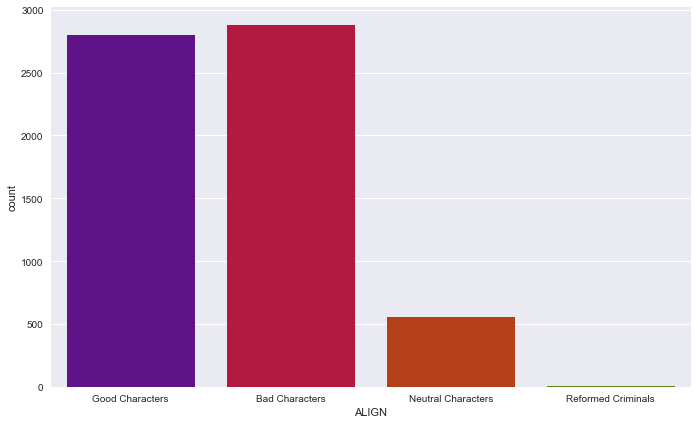

In [114]:
sns.factorplot('ALIGN',data=dc_df,kind='count',palette='brg',size=6,aspect=1.6)

In [115]:
dc_df

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,Batman (Bruce Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3093,"1939, May",1939
1,Superman (Clark Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2496,"1986, October",1986
2,Green Lantern (Hal Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1565,"1959, October",1959
3,James Gordon (New Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,1316,"1987, February",1987
4,Richard Grayson (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1237,"1940, April",1940
5,Wonder Woman (Diana Prince),Public Identity,Good Characters,Blue Eyes,Black Hair,Female Characters,Living Characters,1231,"1941, December",1941
6,Aquaman (Arthur Curry),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,1121,"1941, November",1941
7,Timothy Drake (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1095,"1989, August",1989
8,Dinah Laurel Lance (New Earth),Public Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,Living Characters,1075,"1969, November",1969
9,Flash (Barry Allen),Secret Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,1028,"1956, October",1956


In [116]:
good_df = dc_df.loc[dc_df['ALIGN']=='Good Characters']
bad_df = dc_df.loc[dc_df['ALIGN']=='Bad Characters']

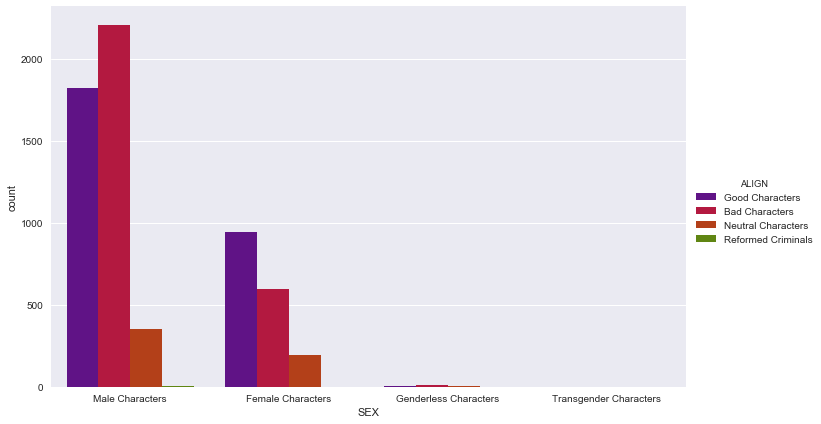

In [117]:
sns.factorplot('SEX',data=dc_df,hue='ALIGN',kind='count',palette='brg',size=6,aspect=1.6)

In [118]:
def create_yr_range(passenger):
    year = passenger
    
    if    1930 <year['YEAR'] <= 1940:
        return "1930-1940"
    if 1940 <year['YEAR'] <= 1950:
        return "1940-1950"
    if 1950 <year['YEAR'] <= 1960:
        return "1950-1960"
    if 1960 <year['YEAR'] <= 1970:
        return "1960-1970"
    if 1970 <year['YEAR'] <= 1980:
        return "1970-1980"
    if 1980 <year['YEAR'] <= 1990:
        return "1980-1990"
    if 1990 <year['YEAR'] <= 2000:
        return "1990-2000"
    
        

    
dc_df['YR_RNG'] = dc_df.apply(create_yr_range,axis=1) 

In [119]:
dc_df

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,YR_RNG
0,Batman (Bruce Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3093,"1939, May",1939,1930-1940
1,Superman (Clark Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2496,"1986, October",1986,1980-1990
2,Green Lantern (Hal Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1565,"1959, October",1959,1950-1960
3,James Gordon (New Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,1316,"1987, February",1987,1980-1990
4,Richard Grayson (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1237,"1940, April",1940,1930-1940
5,Wonder Woman (Diana Prince),Public Identity,Good Characters,Blue Eyes,Black Hair,Female Characters,Living Characters,1231,"1941, December",1941,1940-1950
6,Aquaman (Arthur Curry),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,1121,"1941, November",1941,1940-1950
7,Timothy Drake (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1095,"1989, August",1989,1980-1990
8,Dinah Laurel Lance (New Earth),Public Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,Living Characters,1075,"1969, November",1969,1960-1970
9,Flash (Barry Allen),Secret Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,1028,"1956, October",1956,1950-1960


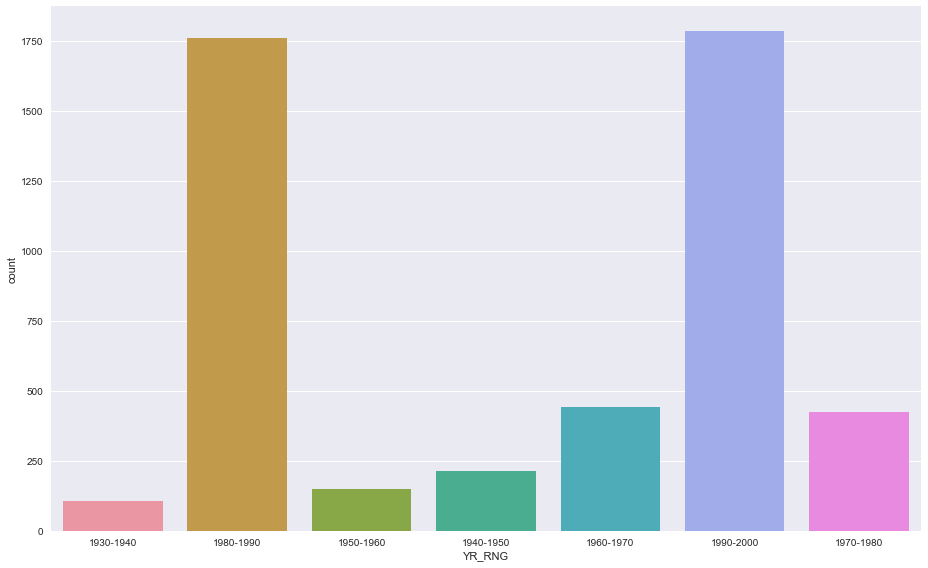

In [120]:
sns.factorplot('YR_RNG',data=dc_df,kind='count',size=8,aspect=1.6)

In [121]:
dc_df['ID'].value_counts()

Public Identity     2438
Secret Identity     2395
Identity Unknown       9
Name: ID, dtype: int64

In [122]:
dc_df['ALIGN'].value_counts()

Bad Characters        2879
Good Characters       2796
Neutral Characters     556
Reformed Criminals       3
Name: ALIGN, dtype: int64

In [123]:
def identity_int(data):
    if data['ID'] == 'Public Identity':
       return 0
    elif data['ID'] == 'Secret Identity':
       return 1 


   
dc_df['IDENTITY'] = dc_df.apply(identity_int,axis=1) 
dc_df['IDENTITY'] = dc_df['IDENTITY'].fillna(2.0) 

In [124]:
dc_df = dc_df.drop(['ID'],axis=1)
dc_df

,name,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,YR_RNG,IDENTITY
0,Batman (Bruce Wayne),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3093,"1939, May",1939,1930-1940,1.0
1,Superman (Clark Kent),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2496,"1986, October",1986,1980-1990,1.0
2,Green Lantern (Hal Jordan),Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1565,"1959, October",1959,1950-1960,1.0
3,James Gordon (New Earth),Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,1316,"1987, February",1987,1980-1990,0.0
4,Richard Grayson (New Earth),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1237,"1940, April",1940,1930-1940,1.0
5,Wonder Woman (Diana Prince),Good Characters,Blue Eyes,Black Hair,Female Characters,Living Characters,1231,"1941, December",1941,1940-1950,0.0
6,Aquaman (Arthur Curry),Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,1121,"1941, November",1941,1940-1950,0.0
7,Timothy Drake (New Earth),Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1095,"1989, August",1989,1980-1990,1.0
8,Dinah Laurel Lance (New Earth),Good Characters,Blue Eyes,Blond Hair,Female Characters,Living Characters,1075,"1969, November",1969,1960-1970,0.0
9,Flash (Barry Allen),Good Characters,Blue Eyes,Blond Hair,Male Characters,Living Characters,1028,"1956, October",1956,1950-1960,1.0


In [125]:
def align_int(data):
    if data['ALIGN'] == 'Bad Characters':
       return 0
    elif data['ALIGN'] == 'Good Characters':
       return 1 
    elif data['ALIGN'] == 'Neutral Characters':
       return 2
    elif data['ALIGN'] == 'Reformed Criminals':
       return 3
dc_df['CHARACTER'] = dc_df.apply(align_int,axis=1)


In [126]:
dc_df['CHARACTER'] = dc_df['CHARACTER'].fillna(99)

In [127]:
dc_df = dc_df.drop(['ALIGN'],axis=1)

In [128]:
dc_df

,name,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,YR_RNG,IDENTITY,CHARACTER
0,Batman (Bruce Wayne),Blue Eyes,Black Hair,Male Characters,Living Characters,3093,"1939, May",1939,1930-1940,1.0,1.0
1,Superman (Clark Kent),Blue Eyes,Black Hair,Male Characters,Living Characters,2496,"1986, October",1986,1980-1990,1.0,1.0
2,Green Lantern (Hal Jordan),Brown Eyes,Brown Hair,Male Characters,Living Characters,1565,"1959, October",1959,1950-1960,1.0,1.0
3,James Gordon (New Earth),Brown Eyes,White Hair,Male Characters,Living Characters,1316,"1987, February",1987,1980-1990,0.0,1.0
4,Richard Grayson (New Earth),Blue Eyes,Black Hair,Male Characters,Living Characters,1237,"1940, April",1940,1930-1940,1.0,1.0
5,Wonder Woman (Diana Prince),Blue Eyes,Black Hair,Female Characters,Living Characters,1231,"1941, December",1941,1940-1950,0.0,1.0
6,Aquaman (Arthur Curry),Blue Eyes,Blond Hair,Male Characters,Living Characters,1121,"1941, November",1941,1940-1950,0.0,1.0
7,Timothy Drake (New Earth),Blue Eyes,Black Hair,Male Characters,Living Characters,1095,"1989, August",1989,1980-1990,1.0,1.0
8,Dinah Laurel Lance (New Earth),Blue Eyes,Blond Hair,Female Characters,Living Characters,1075,"1969, November",1969,1960-1970,0.0,1.0
9,Flash (Barry Allen),Blue Eyes,Blond Hair,Male Characters,Living Characters,1028,"1956, October",1956,1950-1960,1.0,1.0


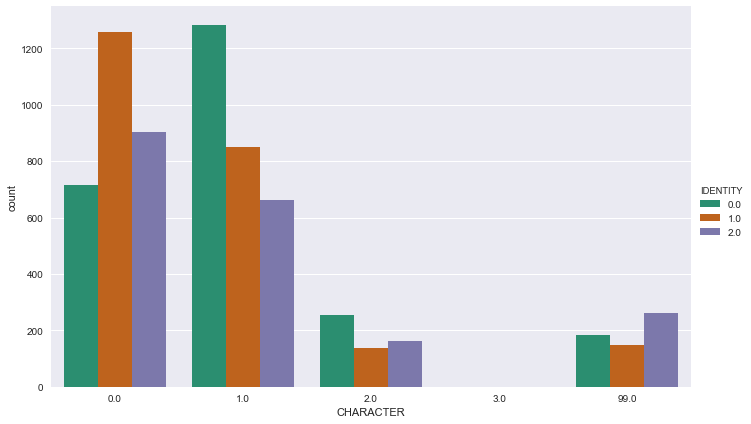

In [129]:
sns.factorplot('CHARACTER',data = dc_df,hue = 'IDENTITY',kind='count',palette='Dark2',size=6,aspect=1.6)

eye and hair colotr combination

In [130]:
dc_df['EYE'].value_counts()

NO INFO               3575
Blue Eyes             1097
Brown Eyes             874
Black Eyes             411
Green Eyes             290
Red Eyes               208
White Eyes             116
Yellow Eyes             83
Photocellular Eyes      48
Grey Eyes               39
Hazel Eyes              23
Purple Eyes             14
Violet Eyes             12
Orange Eyes             10
Gold Eyes                9
Auburn Hair              7
Pink Eyes                6
Amber Eyes               5
Name: EYE, dtype: int64

In [131]:
dc_df['HAIR'] = dc_df['HAIR'].fillna('NO INFO')
dc_df['EYE'] = dc_df['EYE'].map(lambda x : x.rstrip('Eyes'))
dc_df['HAIR'] = dc_df['HAIR'].map(lambda x : x.rstrip('Hair'))